In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
users=pd.read_csv('Collabrative Filtering T.csv')


In [6]:
print(users.shape)
print(list(users.columns))

(30, 38)
['User ID', 'Rowdy Baby', 'Vaathi Coming', 'Enjoy Enjaami', 'Why This Kolaveri Di', 'Aalaporan Thamizhan', 'Vaseegara', 'Marana Mass', 'Kannamma', 'Dippam Dappam', 'Anbe Anbe', 'Otha Sollaala', 'Mukkala Mukkabala', 'Maya Nadhi', 'Kannaana Kanne', 'Kaatru Veliyidai', 'Kalyana Vayasu', 'Danga Maari', 'Aathi', 'Selfie Pulla', 'Aathi Enna Nee', 'Thani Oruvan', 'Oru Naal Koothu', 'Vennilave', 'Mental Manadhil', 'Kutti Story', 'Pudhu Vellai Mazhai', 'Unnai Kaanadhu Naan', 'Adiye', 'Uyire', 'Kadhalan', 'Appadi Podu', 'Usure Pogudhey', 'Nenjukkul Peidhidum', 'Saarattu Vandiyila', 'Kannamma.1', 'Maduraikku Pogathadi', 'Dhevathaiyai']


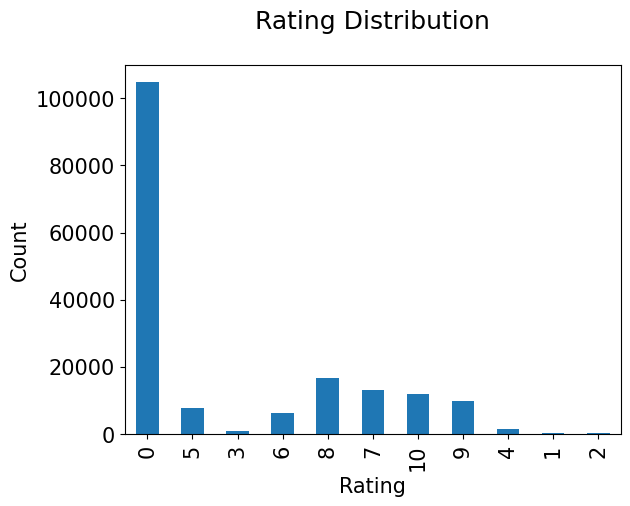

In [13]:
plt.rc('font',size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png',bbox_inches='tight')
plt.show()

In [14]:
print(books.shape)
print(list(books.columns))

(61053, 8)
['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [15]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


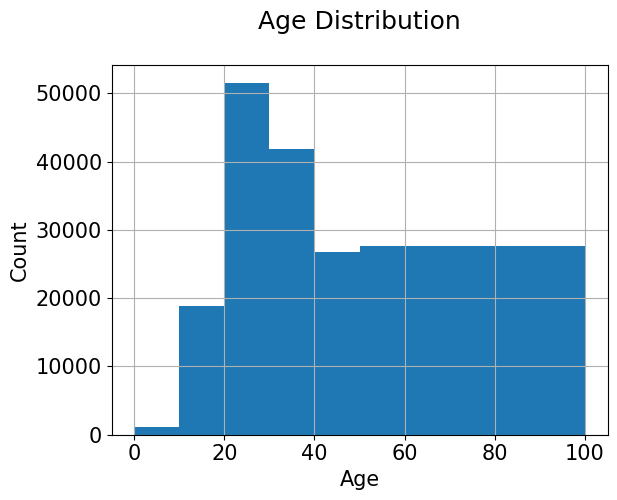

In [18]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png',bbox_inches='tight')
plt.show()

In [19]:

counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [22]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['YearOfPublication', 'publisher', 'BookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,BookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [30]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['BookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['BookTitle'])['bookRating'].
     count().
     reset_index().rename(columns = {'bookRating': 'totalRatingCount'})
     [['BookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,BookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,1
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Earth Prayers From around the World: 365 Pray...,1
3,Final Fantasy Anthology: Official Strategy Gu...,2
4,It Takes Two,1


In [33]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'BookTitle', 
                                                         right_on = 'BookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,BookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,13
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,13
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,13
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,13
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,13


In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   32279.000
mean        1.863
std         2.299
min         1.000
25%         1.000
50%         1.000
75%         2.000
max        47.000
Name: totalRatingCount, dtype: float64


In [36]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    3.000
0.910    4.000
0.920    4.000
0.930    4.000
0.940    5.000
0.950    5.000
0.960    6.000
0.970    7.000
0.980    9.000
0.990   12.000
Name: totalRatingCount, dtype: float64


In [42]:
popularity_threshold = 40
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,BookTitle,totalRatingCount
152,277427,0142001740,0,The Secret Life of Bees,42
153,254,0142001740,9,The Secret Life of Bees,42
154,2766,0142001740,0,The Secret Life of Bees,42
155,4017,0142001740,0,The Secret Life of Bees,42
156,6543,0142001740,9,The Secret Life of Bees,42


In [43]:
rating_popular_book.shape

(215, 5)

In [44]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,BookTitle,totalRatingCount,Location
0,277427,0142001740,0,The Secret Life of Bees,42,"gilbert, arizona, usa"
1,254,0142001740,9,The Secret Life of Bees,42,"minneapolis, minnesota, usa"
2,2766,0142001740,0,The Secret Life of Bees,42,"frisco, texas, usa"
3,4017,0142001740,0,The Secret Life of Bees,42,"new orleans, louisiana, usa"
4,6543,0142001740,9,The Secret Life of Bees,42,"strafford, missouri, usa"


In [54]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'BookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'BookTitle',
                                                          columns = 'userID', 
                                                          values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [58]:
us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  9.,  0.,
         0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  0.]])

In [57]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1)
, n_neighbors = 5)


2


In [59]:
us_canada_user_rating_pivot.index[query_index]

'The Pelican Brief'

In [60]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Pelican Brief:

1: Bridget Jones's Diary, with distance of 0.6484575621766678:
2: The Secret Life of Bees, with distance of 0.9311329498394652:
3: Wild Animus, with distance of 0.9343482273388488:
4: Divine Secrets of the Ya-Ya Sisterhood: A Novel, with distance of 1.0:
